<a href="https://colab.research.google.com/github/yoursmaddyy/Machine-Learning-Track/blob/main/routllete_wheel_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use default example? (y/n): y

✅ Using default example:
  Jackpot: 0.05 (5.0%)
  Big Win: 0.15 (15.0%)
  Small Win: 0.3 (30.0%)
  Try Again: 0.5 (50.0%)

🎮 Starting simulator...
Controls:
  SPACE - Spin the wheel
  R     - Reset statistics
  Q     - Quit



/tmp/ipython-input-243760547.py:282: UserWarning: Glyph 127920 (\N{SLOT MACHINE}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.05, 1, 0.96])
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127920 (\N{SLOT MACHINE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


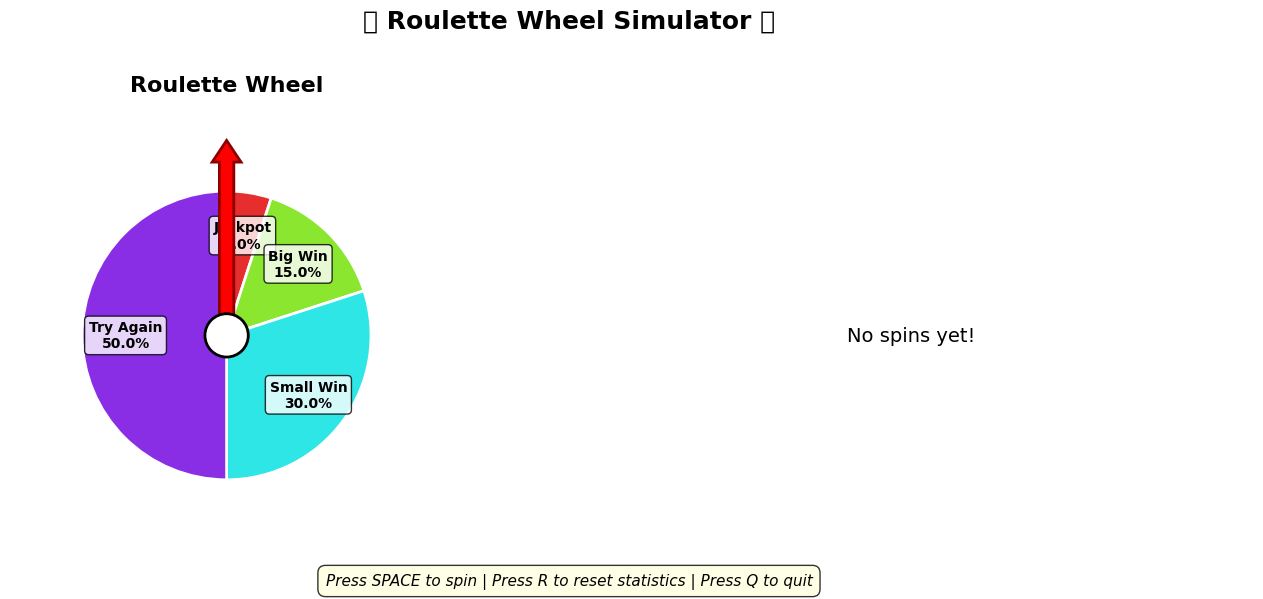

In [1]:
  """
Roulette Wheel Simulator
A complete Python program for simulating a roulette wheel with custom items and probabilities.
Includes visualization, animation, and statistics tracking.
"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge, FancyArrow
from matplotlib.animation import FuncAnimation
from collections import Counter
import colorsys


class RouletteWheel:
    """
    A class representing a roulette wheel with custom items and probabilities.

    Attributes:
        items (list): List of item names on the wheel
        probabilities (np.array): Normalized probabilities for each item
        colors (list): Colors assigned to each wheel segment
        spin_history (list): History of all spin results
    """

    def __init__(self, items_dict):
        """
        Initialize the roulette wheel with items and probabilities.

        Args:
            items_dict (dict): Dictionary mapping item names to probabilities
                              e.g., {'A': 0.49, 'B': 0.06, 'C': 0.45}
        """
        self.items = list(items_dict.keys())
        probs = np.array(list(items_dict.values()))

        # Normalize probabilities to sum to 1.0
        self.probabilities = probs / probs.sum()

        # Generate visually distinct colors for each segment
        self.colors = self._generate_colors(len(self.items))

        # Track spin history for statistics
        self.spin_history = []

        # Current rotation angle for animation
        self.current_angle = 0

    def _generate_colors(self, n):
        """
        Generate n visually distinct colors using HSV color space.

        Args:
            n (int): Number of colors to generate

        Returns:
            list: List of RGB color tuples
        """
        colors = []
        for i in range(n):
            hue = i / n
            # Use high saturation and value for vibrant colors
            rgb = colorsys.hsv_to_rgb(hue, 0.8, 0.9)
            colors.append(rgb)
        return colors

    def spin(self):
        """
        Perform a single spin of the wheel using weighted random selection.

        Returns:
            str: The selected item
        """
        # Use numpy's random.choice with probabilities for weighted selection
        result = np.random.choice(self.items, p=self.probabilities)
        self.spin_history.append(result)
        return result

    def get_statistics(self):
        """
        Calculate statistics from spin history.

        Returns:
            dict: Dictionary containing counts and frequencies of each item
        """
        if not self.spin_history:
            return {}

        counts = Counter(self.spin_history)
        total = len(self.spin_history)

        stats = {}
        for item in self.items:
            count = counts.get(item, 0)
            stats[item] = {
                'count': count,
                'frequency': count / total,
                'expected': self.probabilities[self.items.index(item)]
            }

        return stats

    def draw_wheel(self, ax, highlight_item=None, rotation=0):
        """
        Draw the roulette wheel as a pie chart.

        Args:
            ax: Matplotlib axis object
            highlight_item (str): Item to highlight (optional)
            rotation (float): Rotation angle in degrees
        """
        ax.clear()
        ax.set_aspect('equal')

        # Calculate cumulative angles for each segment
        # Start from top (90 degrees) and go clockwise
        start_angle = 90 + rotation
        cumulative_angles = np.cumsum([0] + list(self.probabilities * 360))

        # Draw each wedge
        for i, (item, prob) in enumerate(zip(self.items, self.probabilities)):
            angle = start_angle - cumulative_angles[i]
            wedge_angle = prob * 360

            # Highlight the selected item with a brighter color
            color = self.colors[i]
            if highlight_item == item:
                # Brighten the color by increasing value in HSV
                h, s, v = colorsys.rgb_to_hsv(*color)
                color = colorsys.hsv_to_rgb(h, s * 0.6, min(v * 1.3, 1.0))
                edge_color = 'gold'
                edge_width = 4
            else:
                edge_color = 'white'
                edge_width = 2

            # Create wedge (pie slice)
            wedge = Wedge(
                center=(0, 0),
                r=1,
                theta1=angle - wedge_angle,
                theta2=angle,
                facecolor=color,
                edgecolor=edge_color,
                linewidth=edge_width
            )
            ax.add_patch(wedge)

            # Add label at the center of each wedge
            label_angle = np.radians(angle - wedge_angle / 2)
            label_radius = 0.7
            x = label_radius * np.cos(label_angle)
            y = label_radius * np.sin(label_angle)

            # Add text with probability percentage
            text = f'{item}\n{prob*100:.1f}%'
            ax.text(x, y, text, ha='center', va='center',
                   fontsize=10, fontweight='bold',
                   bbox=dict(boxstyle='round,pad=0.3',
                           facecolor='white', alpha=0.8))

        # Draw pointer (fixed at top)
        pointer_length = 1.2
        pointer = FancyArrow(
            0, 0, 0, pointer_length,
            width=0.1, head_width=0.2, head_length=0.15,
            fc='red', ec='darkred', linewidth=2,
            zorder=10
        )
        ax.add_patch(pointer)

        # Add circle at center for aesthetics
        center_circle = plt.Circle((0, 0), 0.15, color='white',
                                   ec='black', linewidth=2, zorder=11)
        ax.add_patch(center_circle)

        # Set axis limits and remove axes
        ax.set_xlim(-1.5, 1.5)
        ax.set_ylim(-1.5, 1.5)
        ax.axis('off')

        # Add title
        if highlight_item:
            ax.set_title(f'🎯 Result: {highlight_item}',
                        fontsize=16, fontweight='bold', pad=20)
        else:
            ax.set_title('Roulette Wheel',
                        fontsize=16, fontweight='bold', pad=20)

    def draw_statistics(self, ax):
        """
        Draw a bar chart showing spin statistics vs expected probabilities.

        Args:
            ax: Matplotlib axis object
        """
        ax.clear()

        stats = self.get_statistics()
        if not stats:
            ax.text(0.5, 0.5, 'No spins yet!',
                   ha='center', va='center', fontsize=14)
            ax.axis('off')
            return

        items = list(stats.keys())
        frequencies = [stats[item]['frequency'] for item in items]
        expected = [stats[item]['expected'] for item in items]
        counts = [stats[item]['count'] for item in items]

        x = np.arange(len(items))
        width = 0.35

        # Create grouped bar chart
        bars1 = ax.bar(x - width/2, frequencies, width,
                      label='Actual', color='steelblue', alpha=0.8)
        bars2 = ax.bar(x + width/2, expected, width,
                      label='Expected', color='coral', alpha=0.8)

        # Add count labels on bars
        for bar, count in zip(bars1, counts):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{count}', ha='center', va='bottom', fontsize=9)

        ax.set_xlabel('Items', fontsize=11, fontweight='bold')
        ax.set_ylabel('Frequency', fontsize=11, fontweight='bold')
        ax.set_title(f'Statistics ({len(self.spin_history)} spins)',
                    fontsize=12, fontweight='bold')
        ax.set_xticks(x)
        ax.set_xticklabels(items)
        ax.legend()
        ax.grid(axis='y', alpha=0.3)
        ax.set_ylim(0, max(max(frequencies), max(expected)) * 1.2)


class RouletteSimulator:
    """
    Main simulator class that handles the GUI and animation.
    """

    def __init__(self, items_dict):
        """
        Initialize the simulator.

        Args:
            items_dict (dict): Dictionary of items and probabilities
        """
        self.wheel = RouletteWheel(items_dict)
        self.fig = None
        self.ax_wheel = None
        self.ax_stats = None
        self.animation = None
        self.is_spinning = False

    def setup_plot(self):
        """
        Set up the matplotlib figure with wheel and statistics subplots.
        """
        self.fig = plt.figure(figsize=(14, 6))
        self.fig.suptitle('🎰 Roulette Wheel Simulator 🎰',
                         fontsize=18, fontweight='bold')

        # Create subplots: wheel on left, statistics on right
        self.ax_wheel = self.fig.add_subplot(121)
        self.ax_stats = self.fig.add_subplot(122)

        # Initial draw
        self.wheel.draw_wheel(self.ax_wheel)
        self.wheel.draw_statistics(self.ax_stats)

        # Add instructions
        self.fig.text(0.5, 0.02,
                     'Press SPACE to spin | Press R to reset statistics | Press Q to quit',
                     ha='center', fontsize=11, style='italic',
                     bbox=dict(boxstyle='round,pad=0.5',
                             facecolor='lightyellow', alpha=0.8))

        # Connect keyboard events
        self.fig.canvas.mpl_connect('key_press_event', self.on_key_press)

        plt.tight_layout(rect=[0, 0.05, 1, 0.96])

    def on_key_press(self, event):
        """
        Handle keyboard events.

        Args:
            event: Matplotlib key press event
        """
        if event.key == ' ' and not self.is_spinning:
            # Space bar: spin the wheel
            self.animate_spin()
        elif event.key == 'r':
            # R key: reset statistics
            self.wheel.spin_history = []
            self.wheel.draw_statistics(self.ax_stats)
            self.fig.canvas.draw()
        elif event.key == 'q':
            # Q key: quit
            plt.close(self.fig)

    def animate_spin(self):
        """
        Animate the wheel spinning and show the result.
        Uses matplotlib animation to create a smooth rotation effect.
        """
        if self.is_spinning:
            return

        self.is_spinning = True

        # Select the result before animation starts
        result = self.wheel.spin()

        # Calculate target angle
        # Find which segment was selected
        result_index = self.wheel.items.index(result)
        cumulative_probs = np.cumsum([0] + list(self.wheel.probabilities))

        # Target the middle of the selected segment
        segment_start = cumulative_probs[result_index] * 360
        segment_end = cumulative_probs[result_index + 1] * 360
        segment_middle = (segment_start + segment_end) / 2

        # We want this segment to align with the pointer (top)
        # Add several full rotations for effect
        num_rotations = 5
        target_angle = 360 * num_rotations + segment_middle

        # Animation parameters
        total_frames = 120
        angles = []

        # Create easing function (ease-out cubic)
        for i in range(total_frames):
            t = i / total_frames
            # Ease-out cubic: t * t * (3 - 2 * t)
            eased_t = t * t * (3 - 2 * t)
            angle = eased_t * target_angle
            angles.append(angle)

        frame_counter = [0]  # Use list to allow modification in nested function

        def update(frame):
            """Update function for animation."""
            if frame_counter[0] < len(angles):
                angle = angles[frame_counter[0]]
                self.wheel.draw_wheel(self.ax_wheel, rotation=angle)
                frame_counter[0] += 1
            else:
                # Animation finished, show result with highlight
                self.wheel.draw_wheel(self.ax_wheel,
                                    highlight_item=result,
                                    rotation=target_angle)
                self.wheel.draw_statistics(self.ax_stats)
                self.is_spinning = False
                self.animation.event_source.stop()

            return []

        # Create and start animation
        self.animation = FuncAnimation(
            self.fig, update, frames=total_frames + 10,
            interval=20, repeat=False, blit=True
        )

        self.fig.canvas.draw()

    def run(self):
        """
        Run the simulator (display the plot and wait for user interaction).
        """
        self.setup_plot()
        plt.show()


def get_user_input():
    """
    Get custom items and probabilities from user input.

    Returns:
        dict: Dictionary mapping items to probabilities
    """
    print("=" * 60)
    print("🎰 ROULETTE WHEEL SIMULATOR 🎰")
    print("=" * 60)
    print("\nEnter items and their probabilities.")
    print("Format: ItemName=probability (e.g., A=0.49)")
    print("Probabilities will be automatically normalized if needed.")
    print("Enter 'done' when finished.\n")

    items_dict = {}

    while True:
        user_input = input("Enter item (or 'done'): ").strip()

        if user_input.lower() == 'done':
            if len(items_dict) < 2:
                print("⚠️  Please enter at least 2 items!")
                continue
            break

        try:
            # Parse input in format "Name=probability"
            if '=' not in user_input:
                print("❌ Invalid format! Use: ItemName=probability")
                continue

            name, prob_str = user_input.split('=', 1)
            name = name.strip()
            prob = float(prob_str.strip())

            if prob <= 0:
                print("❌ Probability must be positive!")
                continue

            if name in items_dict:
                print(f"⚠️  Item '{name}' already exists. Updating probability.")

            items_dict[name] = prob
            print(f"✅ Added: {name} = {prob}")

        except ValueError:
            print("❌ Invalid input! Please use format: ItemName=probability")

    # Display summary
    print("\n" + "=" * 60)
    print("📊 SUMMARY (normalized probabilities):")
    print("=" * 60)
    total = sum(items_dict.values())
    for name, prob in items_dict.items():
        normalized = prob / total
        print(f"  {name}: {normalized:.4f} ({normalized*100:.2f}%)")
    print("=" * 60 + "\n")

    return items_dict


def main():
    """
    Main function to run the roulette wheel simulator.
    """
    # Option 1: Get user input
    use_default = input("Use default example? (y/n): ").strip().lower()

    if use_default == 'y':
        # Default example with interesting probabilities
        items_dict = {
            'Jackpot': 0.05,
            'Big Win': 0.15,
            'Small Win': 0.30,
            'Try Again': 0.50
        }
        print("\n✅ Using default example:")
        for name, prob in items_dict.items():
            print(f"  {name}: {prob} ({prob*100}%)")
    else:
        items_dict = get_user_input()

    # Create and run simulator
    print("\n🎮 Starting simulator...")
    print("Controls:")
    print("  SPACE - Spin the wheel")
    print("  R     - Reset statistics")
    print("  Q     - Quit\n")

    simulator = RouletteSimulator(items_dict)
    simulator.run()


if __name__ == "__main__":
    main()